In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
data = pd.read_csv("c://data//banking.csv")
data.sample(8)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
32765,31,admin.,divorced,university.degree,no,no,yes,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
31597,45,admin.,married,university.degree,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
15421,47,services,married,basic.6y,no,no,no,telephone,jun,wed,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4694,54,services,married,high.school,no,yes,no,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
35396,28,admin.,married,university.degree,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
14686,41,unemployed,married,professional.course,no,yes,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
19979,37,admin.,divorced,university.degree,unknown,yes,no,cellular,may,wed,...,7,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,0
485,52,housemaid,married,basic.4y,no,no,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

1. data sudah sesuai strukturnya
2. data terlihat tidak ada missing value

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']
num = ['age','duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

In [6]:
data[cat].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


1. pekerjaan paling banyak adalah admin
2. status perkawinan mayoritas sudah menikah
3. status pendidikan mayoritas menyandang gelar dari universitas
4. mayoritas tidak memiliki kartu kredit
5. mayoritas memiliki KPR 
6. mayoritas tidak memiliki pinjaman keuangan pribadi
7. mayoritas tercantum kontak seluler
8. kontak terakhir mayoritas pada bulan mei dan hari kamis
9. hasil dari kampanye pemasaran sebelumnya tidak diketahui

In [7]:
data[num].describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


1. rata-rata umur 40th, dan tidak terlalu jauh dengan median, sehingga nilai skew cukup minimum
2. durasi kontak terakhir rata-rata 258 detik dan median 2 detik, sehingga nilai skew sangat tinggi (lakukan scaling dan normalisasi)
3. rata-rata jumlah kontak yang dilakukan selama kampanye 2.5 (3 kontak) dan nilai median 2 tetapi nilai max 56, kemungkinan skew 
4. jumlah hari yang berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya rata-rata 962 hari 
5. jumlah kontak yang dilakukan sebelum kampanye minim
6. apakah klien telah berlangganan deposito berjangka? mayoritas belum

In [8]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Value count kolom marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Value count kolom education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Value count kolom default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Value count kolom housing:
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Value count kolom loan:
no         33950
y

1. 3 besar teratas pekerjaan terdapat pada admin, buruh, teknisi.
2. 3 bulan kontak terakhir yang teratas ada pada bulan mei, juli, dan agustus sedangkan hari ada pada kamis, senin, dan rabu
3. lulusan pendidikan 3 teratas ada pada lulusan universitas dan SMA

In [9]:
data.isna().sum() #tidak ada data missing value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [10]:
#cek apakah ada data duplikat?
print("data sebelum :",data.duplicated().sum()) #ternyata terdapat duplicated data sehingga harus dihapus
data.drop_duplicates(inplace=True)
print("data sesudah :",data.duplicated().sum())

data sebelum : 12
data sesudah : 0


In [11]:
data.shape #sudah berkurang dataset -12

(41176, 21)

In [12]:
data['y'].replace(to_replace='Yes', value=1, inplace=True)
data['y'].replace(to_replace='No',  value=0, inplace=True)

UNIVARIATE ANALYSIS : untuk melihat karakteristik variable

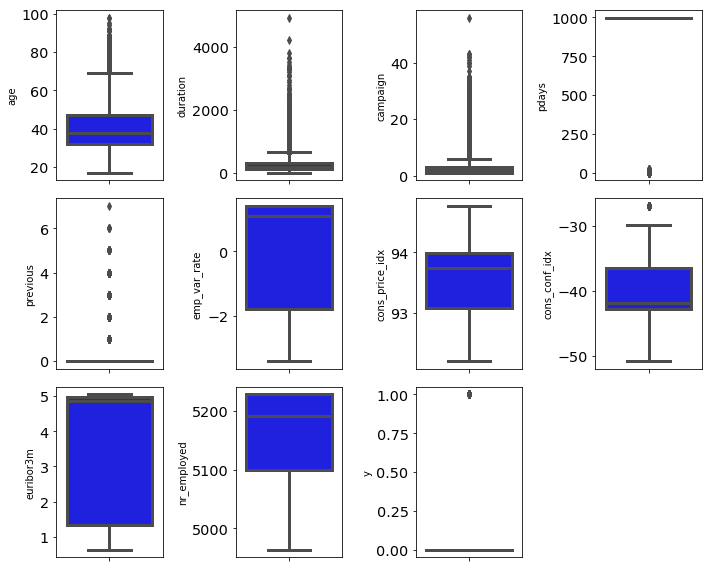

In [15]:
plt.figure(figsize=(10, 8))
for i in range(0, len(num)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data[num[i]], color='blue', orient='v')
    plt.tight_layout()

1. pada variable age, duration, campaign, cons_cons_idx  terdapat outlier dan berbentuk skew positif
2. pada variable euribor3m, nr_employed ada outlier dan berbentuk skew negatif
3. tetapi kita perlu penangan handle outlier untuk semua varible num ini agar data cenderung berbentuk gaussian

<Figure size 864x360 with 0 Axes>

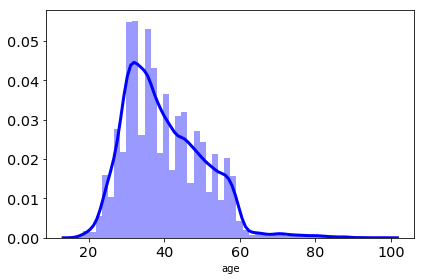

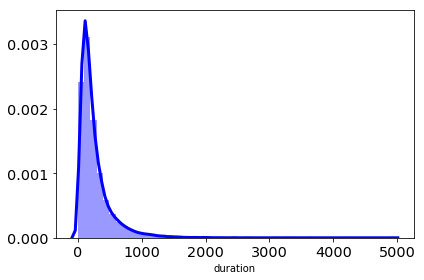

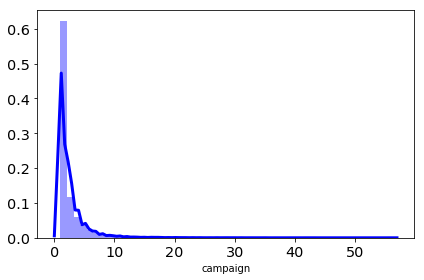

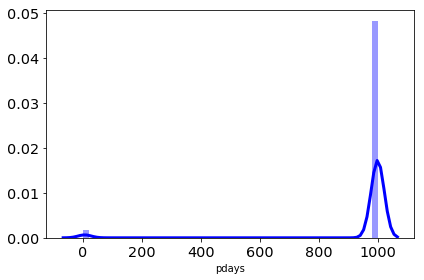

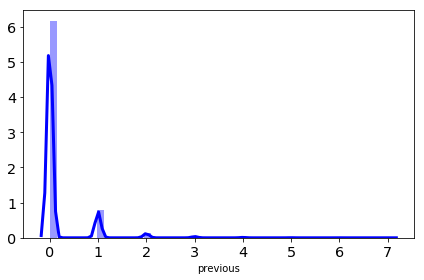

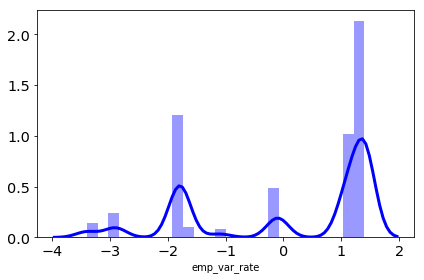

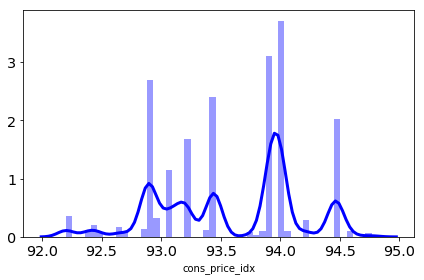

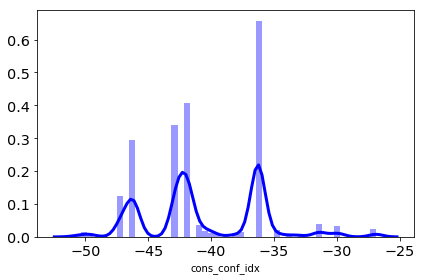

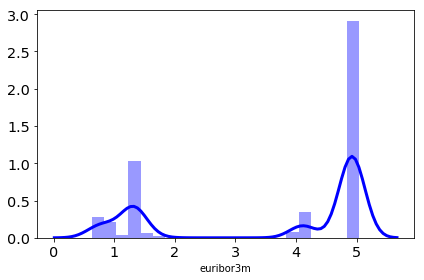

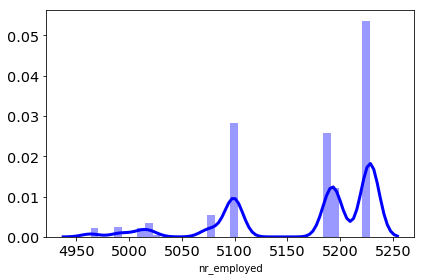

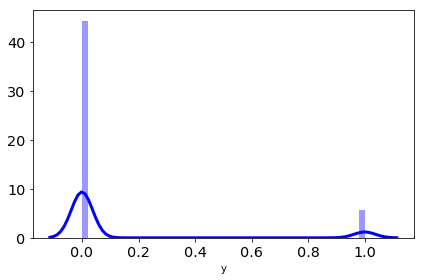

In [16]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(data[num[i]], color='blue')
    plt.tight_layout() 
#hampir semua variable num berbentuk skew positif dan untuk tipe data kategorikal kita ambil tindakan kategorikal handle

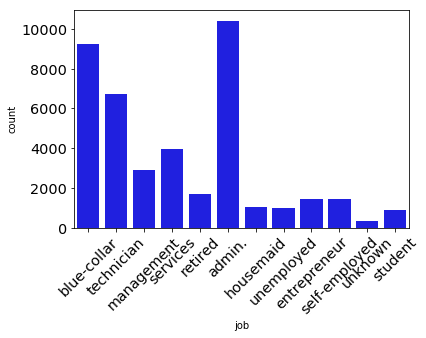

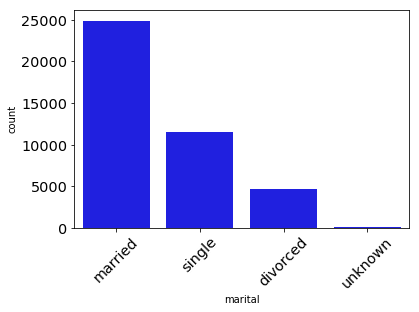

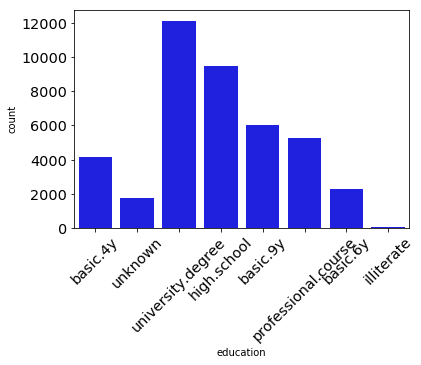

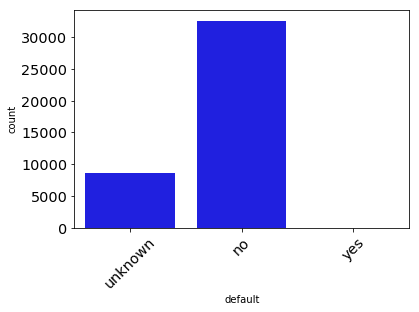

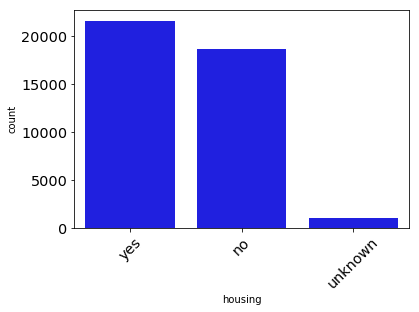

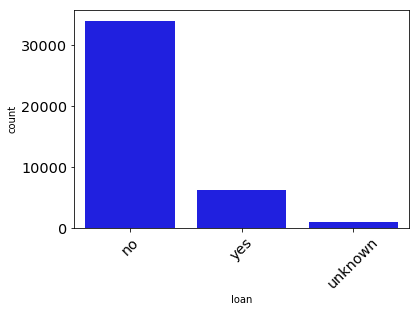

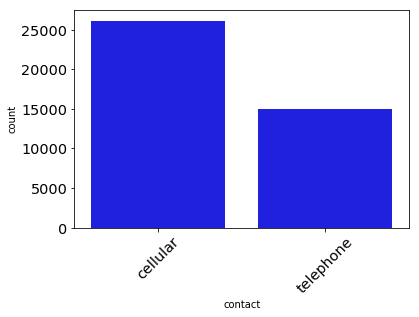

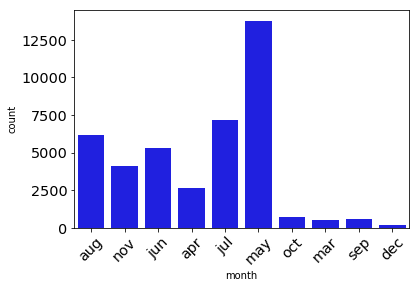

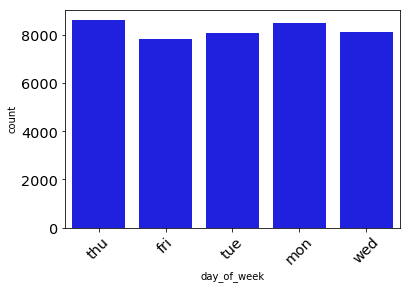

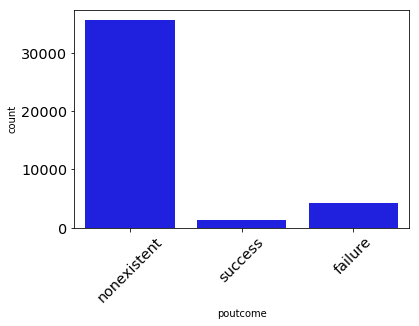

In [18]:
for i in range(0, 10):
    plt.figure()
    sns.countplot(data[cat[i]], color='blue', orient='v')
    plt.xticks(rotation=45)

1. mayoritas bekerja sebagai admin, lalu disusul buruh, dan teknisi
2. mayoritas sudah menikah, berpendidikan diuniversitas, tidak memiliki kartu kredit, tidak memiliki pinjaman pribadi, kontak terakhir dengan seluler pada bulan mei dan tindakan sebelum campaign tidak ada




In [13]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')
#handle outlier by univariate analysis
filtered_entries = np.array([False] * len(data))
for col in ['age','duration', 'campaign','cons_conf_idx', 'euribor3m']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 41176
Jumlah baris setelah memfilter outlier: 35165


In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## melakukan scaling data yang bertipe numerikal

data1['age_norm'] = MinMaxScaler().fit_transform(data1['age'].values.reshape(len(data1), 1))
data1['duration_norm'] = MinMaxScaler().fit_transform(data1['duration'].values.reshape(len(data1), 1))
data1['campaign_norm'] = MinMaxScaler().fit_transform(data1['campaign'].values.reshape(len(data1),1))
data1['pdays_norm'] = MinMaxScaler().fit_transform(data1['pdays'].values.reshape(len(data1),1))
data1['nr_employed_norm'] = MinMaxScaler().fit_transform(data1['nr_employed'].values.reshape(len(data1),1))
data1['cons_price_idx_norm'] = MinMaxScaler().fit_transform(data1['cons_price_idx'].values.reshape(len(data1),1))

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35165 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  35165 non-null  int64  
 1   job                  35165 non-null  object 
 2   marital              35165 non-null  object 
 3   education            35165 non-null  object 
 4   default              35165 non-null  object 
 5   housing              35165 non-null  object 
 6   loan                 35165 non-null  object 
 7   contact              35165 non-null  object 
 8   month                35165 non-null  object 
 9   day_of_week          35165 non-null  object 
 10  duration             35165 non-null  int64  
 11  campaign             35165 non-null  int64  
 12  pdays                35165 non-null  int64  
 13  previous             35165 non-null  int64  
 14  poutcome             35165 non-null  object 
 15  emp_var_rate         35165 non-null 

In [16]:
data2 = data1.drop(['age','duration','campaign','pdays','nr_employed','cons_price_idx'], 1)
data2.tail()

,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,...,emp_var_rate,cons_conf_idx,euribor3m,y,age_norm,duration_norm,campaign_norm,pdays_norm,nr_employed_norm,cons_price_idx_norm
41182,admin.,married,high.school,no,yes,no,cellular,may,thu,1,...,-1.8,-46.2,1.266,0,0.134615,0.183230,0.6,1.0,0.512287,0.269680
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,0,...,1.4,-41.8,4.866,0,0.807692,0.344720,0.0,1.0,1.000000,0.882307
41184,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,0,...,1.1,-36.4,4.860,0,0.269231,0.304348,0.2,1.0,0.859735,0.698753
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,0,...,1.1,-36.4,4.857,0,0.480769,0.096273,0.4,1.0,0.859735,0.698753
41187,student,single,high.school,no,no,no,telephone,may,fri,0,...,1.1,-36.4,4.859,0,0.153846,0.173913,0.6,1.0,0.859735,0.698753


Text(0.5, 1.0, 'PROPORSI PENGGUNA DEPOSITO (%)')

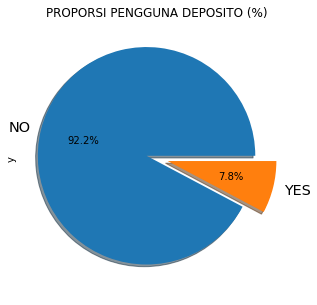

In [17]:
#EDA VISUALIZATION
labels = 'NO', 'YES'
data2['y'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI PENGGUNA DEPOSITO (%)")

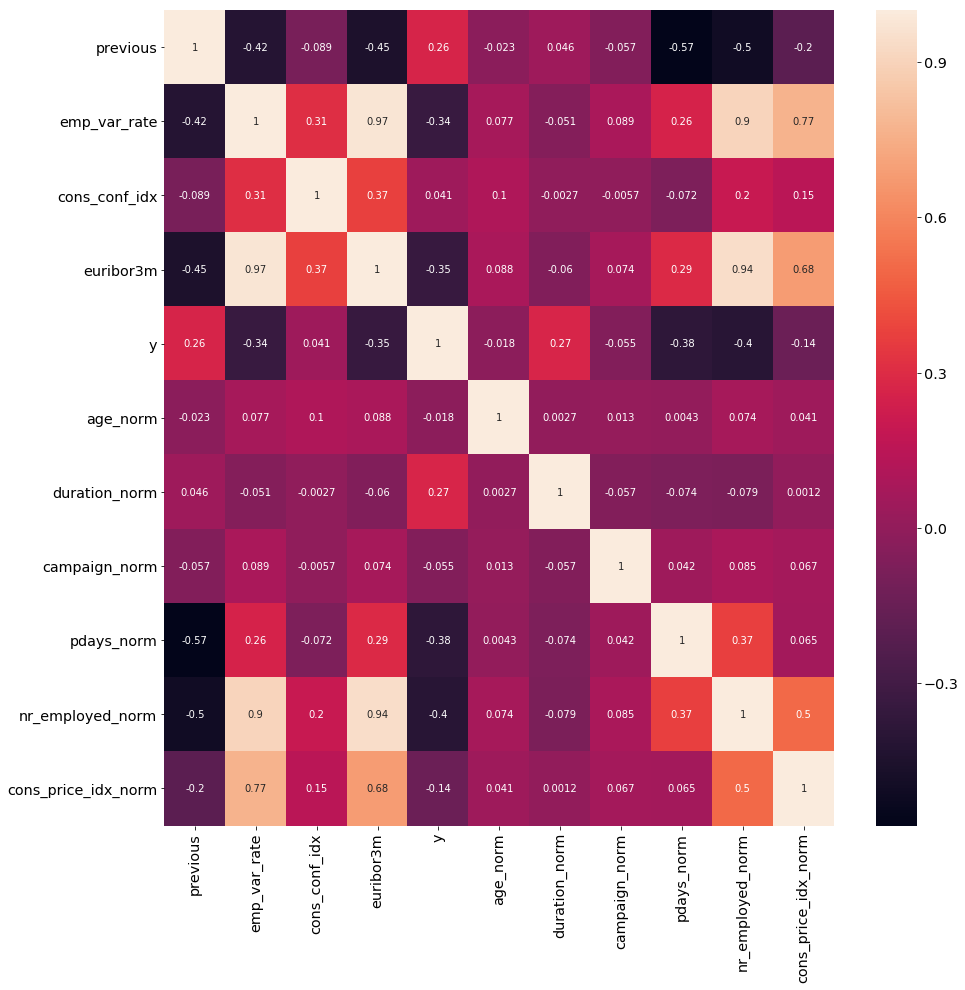

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(data2.corr()
           ,annot=True)#perbesar

In [18]:
#CHECK unique JOB
np.unique(data2['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [19]:
SJ = data2.groupby('job').mean().reset_index()
SJ

,job,previous,emp_var_rate,cons_conf_idx,euribor3m,y,age_norm,duration_norm,campaign_norm,pdays_norm,nr_employed_norm,cons_price_idx_norm
0,admin.,0.191551,0.010762,-40.357365,3.540197,0.101390,0.407284,0.318876,0.214919,0.956133,0.757153,0.519272
1,blue-collar,0.126740,0.230380,-41.416886,3.753781,0.036158,0.434219,0.327115,0.209642,0.986542,0.799300,0.563093
2,entrepreneur,0.146709,0.136717,-41.398017,3.764504,0.053925,0.475096,0.321331,0.206820,0.980289,0.801297,0.543464
3,housemaid,0.122472,0.490225,-39.611798,4.076666,0.069663,0.533470,0.317552,0.202921,0.965371,0.829534,0.578216
4,management,0.185008,-0.009410,-40.707297,3.610946,0.074561,0.487433,0.318870,0.200797,0.966698,0.769469,0.514813
5,retired,0.229299,-0.134304,-39.571338,3.385056,0.152866,0.772888,0.340513,0.217652,0.928529,0.716455,0.523223
6,self-employed,0.145215,0.065594,-40.586881,3.661305,0.071782,0.437786,0.308768,0.221287,0.979480,0.778721,0.527856
7,services,0.163562,0.138388,-41.347875,3.657994,0.049185,0.403320,0.322539,0.213155,0.980899,0.779648,0.555037
8,student,0.542328,-1.408069,-40.486376,1.863140,0.284392,0.170635,0.356317,0.174339,0.842295,0.461590,0.442973
9,technician,0.156384,0.276474,-40.053549,3.817106,0.076645,0.411619,0.311740,0.209727,0.966023,0.801807,0.531578


pekerjaan dengan rata-rata tertinggi untuk ditawari deposito adalah student dan pekerjaan dengan rata-rata terendah untuk ditawari deposito adalah buruh

In [20]:
data2.groupby('marital').mean()

,previous,emp_var_rate,cons_conf_idx,euribor3m,y,age_norm,duration_norm,campaign_norm,pdays_norm,nr_employed_norm,cons_price_idx_norm
marital,,,,,,,,,,,
divorced,0.161041,0.217367,-40.845839,3.778380,0.062870,0.516466,0.319100,0.220046,0.974131,0.796607,0.550652
married,0.151861,0.209297,-40.446997,3.771423,0.065755,0.477079,0.319949,0.208987,0.971548,0.793244,0.545580
single,0.216828,-0.175965,-41.045989,3.302386,0.108565,0.310839,0.323326,0.208082,0.950844,0.722891,0.512389
unknown,0.266667,-0.305000,-41.446667,3.201150,0.116667,0.412179,0.396403,0.190000,0.933867,0.720851,0.477507


cenderung pelanggan yg tidak diketahui statusnya dan single yang lebih baik dijadikan target pasar

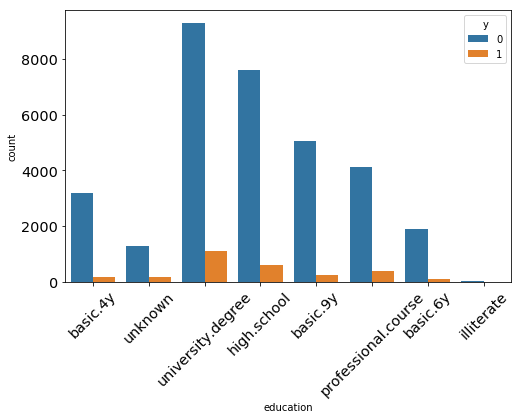

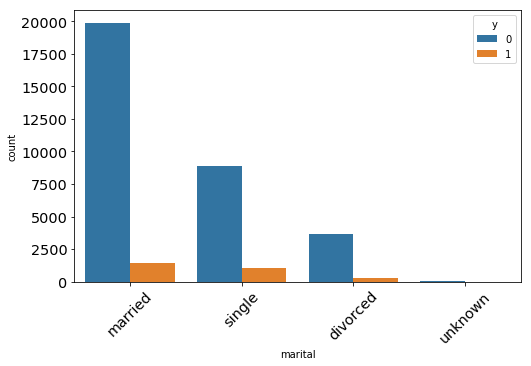

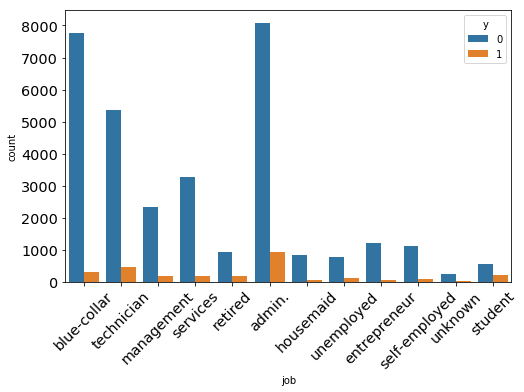

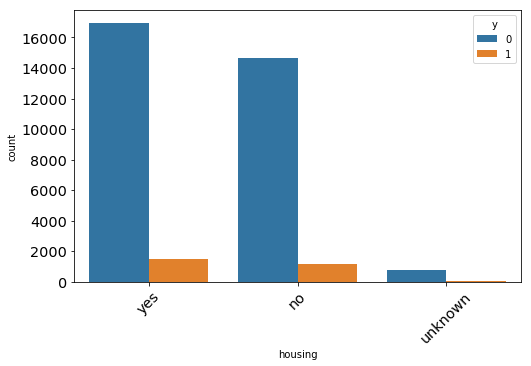

In [49]:
for col in ['education','marital','job','housing']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='y', data=data2, palette="tab10")
    plt.xticks(rotation=45)
    plt.show()

1. job student lebih cenderung menjadi target daripada job lainnya dan disusul dengan job admin
2. pelanggan yang tidak memiliki kredit rumah cenderung memiliki deposito sehingga bagus menjadi target pasar
3. pelanggan berstatus single dan unknown juga bagus dijadikan target pasar

BIVARIATE ANALYSIS : analisis 2 variable dengan melihat bagaimana hubungan antar variablenya

<Figure size 1080x1080 with 0 Axes>

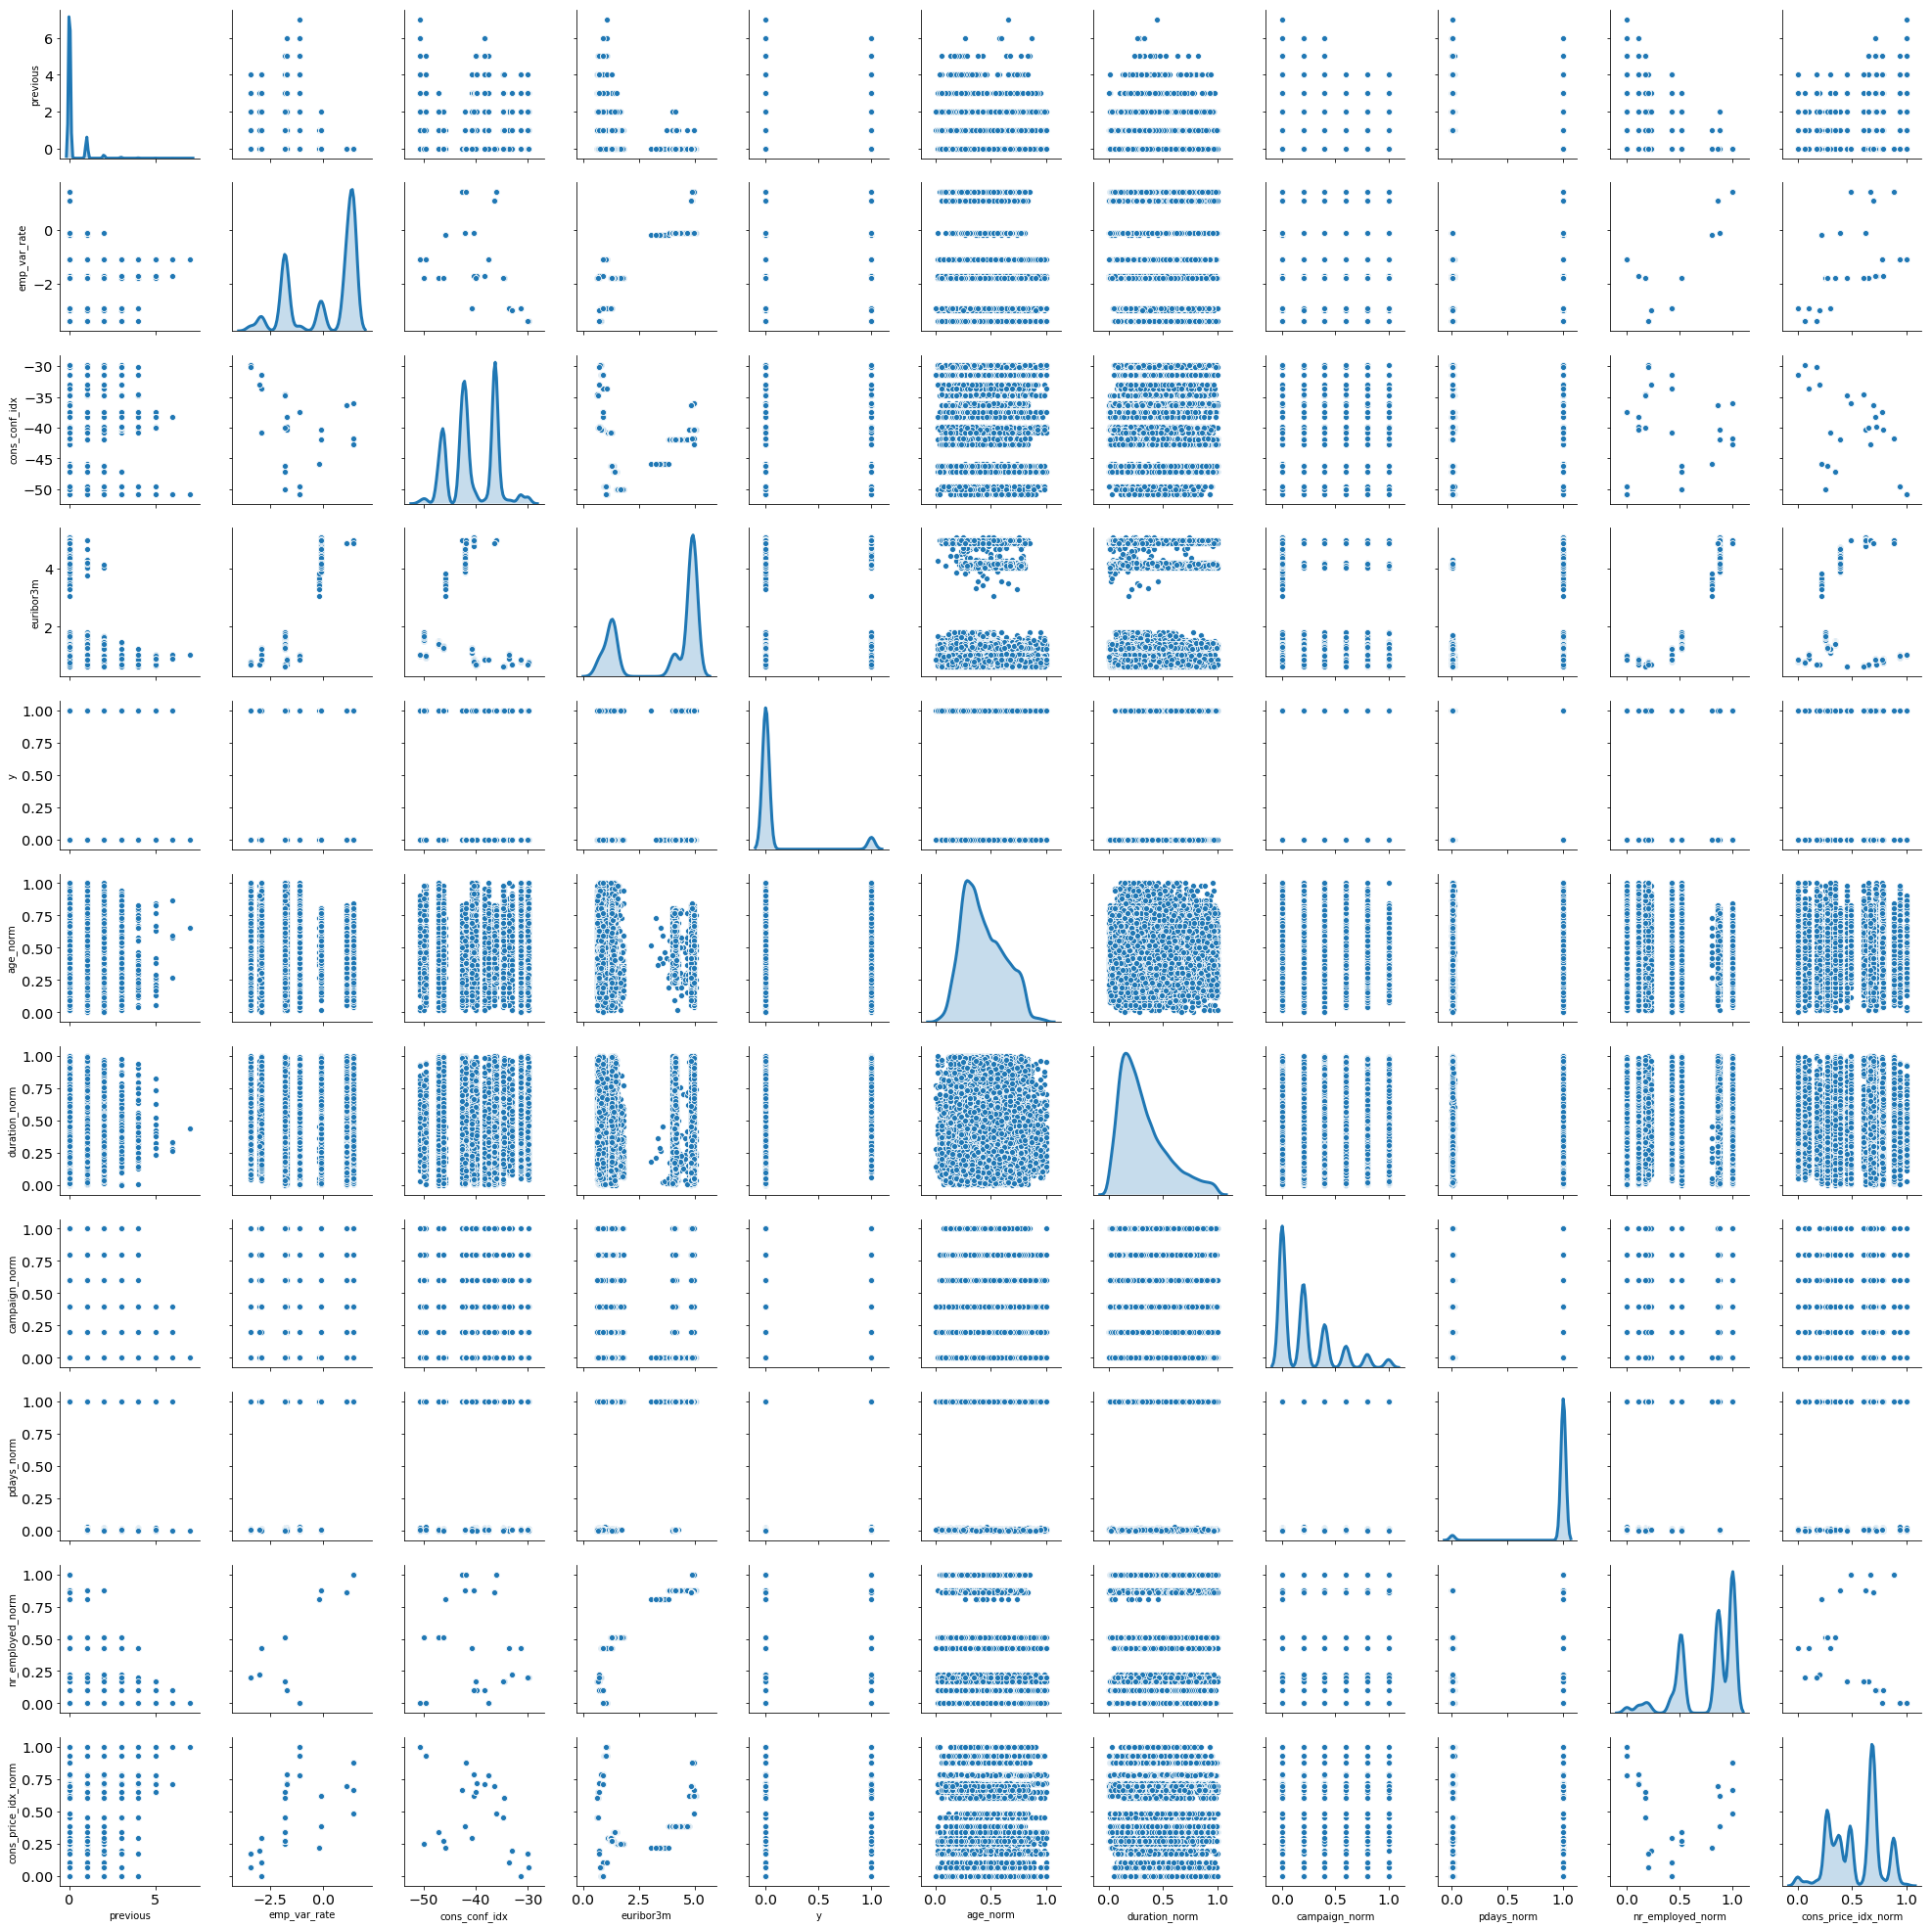

In [51]:
plt.figure(figsize=(15, 15))
sns.pairplot(data2, diag_kind='kde')

variable previous semakin tinggi maka variable campaign_norm, nr_employed_norm, semakin rendah sehingga cenderung multikolinearitas karena berkorelasi sehingga pilih satu atau hapus variable previous

In [21]:
data2 = data2.drop(['previous'],1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35165 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job                  35165 non-null  object 
 1   marital              35165 non-null  object 
 2   education            35165 non-null  object 
 3   default              35165 non-null  object 
 4   housing              35165 non-null  object 
 5   loan                 35165 non-null  object 
 6   contact              35165 non-null  object 
 7   month                35165 non-null  object 
 8   day_of_week          35165 non-null  object 
 9   poutcome             35165 non-null  object 
 10  emp_var_rate         35165 non-null  float64
 11  cons_conf_idx        35165 non-null  float64
 12  euribor3m            35165 non-null  float64
 13  y                    35165 non-null  int64  
 14  age_norm             35165 non-null  float64
 15  duration_norm        35165 non-null 

In [22]:
data3 = pd.get_dummies(data2)
data3.head()

,emp_var_rate,cons_conf_idx,euribor3m,y,age_norm,duration_norm,campaign_norm,pdays_norm,nr_employed_norm,cons_price_idx_norm,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.4,-36.1,4.963,0,0.519231,0.326087,0.0,1.000000,1.000000,0.484412,...,0,0,0,0,1,0,0,0,1,0
1,-0.1,-42.0,4.021,0,0.692308,0.214286,0.0,1.000000,0.877883,0.389322,...,0,0,1,0,0,0,0,0,1,0
2,-1.7,-39.8,0.729,1,0.211538,0.526398,0.4,0.006006,0.105860,0.722525,...,0,0,0,0,1,0,0,0,0,1
3,-1.8,-47.1,1.405,0,0.423077,0.287267,0.2,1.000000,0.512287,0.340608,...,0,0,1,0,0,0,0,0,1,0
4,-2.9,-31.4,0.869,1,0.730769,0.212733,0.0,0.003003,0.425709,0.000000,...,0,0,1,0,0,0,0,0,0,1


In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35165 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   emp_var_rate                   35165 non-null  float64
 1   cons_conf_idx                  35165 non-null  float64
 2   euribor3m                      35165 non-null  float64
 3   y                              35165 non-null  int64  
 4   age_norm                       35165 non-null  float64
 5   duration_norm                  35165 non-null  float64
 6   campaign_norm                  35165 non-null  float64
 7   pdays_norm                     35165 non-null  float64
 8   nr_employed_norm               35165 non-null  float64
 9   cons_price_idx_norm            35165 non-null  float64
 10  job_admin.                     35165 non-null  uint8  
 11  job_blue-collar                35165 non-null  uint8  
 12  job_entrepreneur               35165 non-null 

In [28]:
#data imbalance
data3['y_class'] = data3['y'] > 0.8
data3['y_class'].value_counts()
X1 = data3[[col for col in data3.columns if (str(data3[col].dtype) != 'object') and col not in ['y', 'y_class']]]
y1 = data3['y_class'].values
print(X1.shape)
print(y1.shape)

(35165, 62)
(35165,)


In [29]:
from imblearn.over_sampling import SMOTE
## CODE HERE
from imblearn import under_sampling
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X1, y1)
pd.Series(y_over).value_counts()

False    2730
True     2730
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=75)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print ("Model accuracy",metrics.accuracy_score(y_test, prediction_test)) 

Model accuracy 0.9330300014218683


AxesSubplot(0.125,0.125;0.775x0.755)


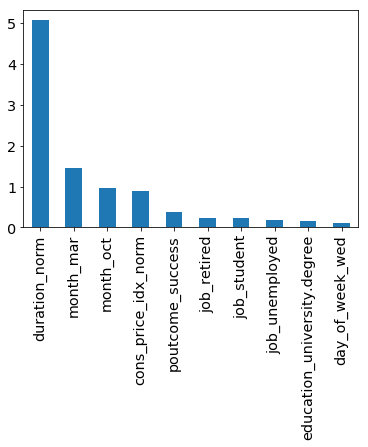

In [35]:
weights = pd.Series(model.coef_[0], #pembobotan variable
                 index=X1.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


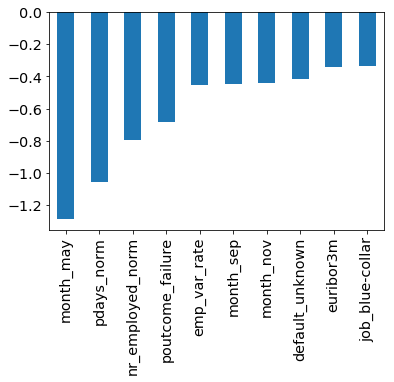

In [36]:
weights = pd.Series(model.coef_[0], #pembobotan variable
                 index=X1.columns.values)
print (weights.sort_values(ascending = True)[:10].plot(kind='bar'))

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)
model_score = rf_cls.score(X_test, y_test)
print('Model Accuracy:', model_score) #model tertinggi yaitu randomforest

Model Accuracy: 0.9395705957628324


In [33]:
#check important variable pada randomforest ensemble model
for column, importance_score in zip(X1, rf_cls.feature_importances_):
    print(column, importance_score)

emp_var_rate 0.02851536148153684
cons_conf_idx 0.03551632959739149
euribor3m 0.12477985477064804
age_norm 0.0783584450775098
duration_norm 0.18476553695548736
campaign_norm 0.034252132383158884
pdays_norm 0.033790465770967094
nr_employed_norm 0.06374444430476892
cons_price_idx_norm 0.03203363518725701
job_admin. 0.012794662999252984
job_blue-collar 0.007804420777468152
job_entrepreneur 0.0034727523997149807
job_housemaid 0.002988076770979534
job_management 0.0060233099987150865
job_retired 0.00523513847853286
job_self-employed 0.004327735240027047
job_services 0.006030067879748943
job_student 0.006285216877338174
job_technician 0.010425657955109628
job_unemployed 0.0038201935613328053
job_unknown 0.0020436822140050426
marital_divorced 0.006900747431629194
marital_married 0.012380982784748988
marital_single 0.01184632130183031
marital_unknown 0.0007745995867330471
education_basic.4y 0.004865706540470456
education_basic.6y 0.003822908965068267
education_basic.9y 0.006786079337664163
educ

In [37]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9273425280818997

In [39]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 100)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)#model tertinggi ketiga ada pada ensemble model adaboost

0.9354471775913551

In [41]:
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
metrics.accuracy_score(y_test, preds)#model tertinggi kedua ada pada ensemble model XGB

0.9395705957628324